In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import QuantileTransformer
from sklearn import tree
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
%matplotlib inline

plt.rcParams["axes.grid"] = True

D:\Anaconda3\envs\jenv\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('data.csv', index_col=None, sep=",")
df

,name,followers,followings,follow ratio,muters,reputation,effective sp,own sp,sp ratio,curation_rewards,posting_rewards,witnesses_voted_for,posts,average_post_len,comments,average_comment_len,comments_with_link_ratio,posts_to_comments_ratio,class
0,anthowarlike,212,34,0.160377,0,56.409193,1.349465e+02,134.946458,1.000000,0.654,265.146,0,0,0,0,0,0.000000,0.000000,0
1,gokcehan61,4117,16596,4.031091,19,51.233260,1.840426e+00,6.897189,0.266837,0.378,143.148,3,0,0,0,0,0.000000,0.000000,0
2,mimikombat,773,701,0.906856,2,60.575495,1.503410e+02,388.205087,0.387272,4.340,762.985,0,125,3366,401,50,0.084788,0.311721,0
3,stixxzyy,238,4,0.016807,0,55.103692,8.356541e+01,83.565407,1.000000,0.000,166.170,0,80,280,0,0,0.000000,0.000000,0
4,akintunde,2171,589,0.271304,9,62.343843,3.119804e+02,448.934538,0.694935,11.737,1025.171,19,21,1941,26,241,0.115385,0.807692,0
5,bryangav,718,80,0.111421,0,55.217102,2.791844e+02,77.046693,3.623574,3.779,183.609,8,62,3023,37,263,0.783784,1.675676,0
6,plouton,50,9,0.180000,0,44.422357,1.500954e+01,6.313641,2.377320,0.011,11.527,0,0,0,0,0,0.000000,0.000000,0
7,marzukie,1546,2585,1.672057,6,54.130093,9.463211e+01,94.632106,1.000000,2.988,146.743,30,77,2597,361,90,0.019391,0.213296,0
8,lisnabuah,25,2,0.080000,0,42.741003,1.190729e+01,0.269269,44.220849,0.002,5.931,0,0,0,0,0,0.000000,0.000000,0
9,nappingkid,255,15,0.058824,1,56.969551,1.773283e+02,177.328282,1.000000,1.110,274.575,0,103,290,8,45,0.000000,12.875000,0


In [3]:
columns = ['followers', 'followings', 'follow ratio', 'muters',
           'reputation', 'effective sp', 'own sp', 'sp ratio', 'curation_rewards',
          'posting_rewards', 'witnesses_voted_for', 'posts', 'average_post_len', 'comments',
          'average_comment_len', 'comments_with_link_ratio', 'posts_to_comments_ratio']

print('feature|content-creator average|scammer average|comment-spammer average|bid-bot average')
print('-|-|-|-|-')
for column in columns:
    print('%s|%.3f|%.3f|%.3f|%.3f' % 
          (column,
           df[df['class'] == 0][column].mean(),
           df[df['class'] == 1][column].mean(),
           df[df['class'] == 2][column].mean(),
           df[df['class'] == 3][column].mean()))

feature|content-creator average|scammer average|comment-spammer average|bid-bot average
-|-|-|-|-
followers|934.567|743.205|487.444|2329.059
followings|994.253|781.329|648.279|1729.388
follow ratio|0.448|0.640|0.738|0.417
muters|4.806|8.739|1.815|14.072
reputation|48.778|20.286|38.383|45.869
effective sp|1295.871|4730.600|238.016|213270.866
own sp|1172.162|883.900|190.076|12649.868
sp ratio|22.412|3075207.413|36.986|78.479
curation_rewards|94.911|145.473|3.793|4951.593
posting_rewards|1058.545|317.027|68.817|1009.702
witnesses_voted_for|3.806|3.712|2.493|2.261
posts|57.722|24.042|55.309|14.971
average_post_len|1174.637|1100.460|1276.239|1925.659
comments|168.451|1126.868|309.525|2635.248
average_comment_len|82.626|87.517|41.009|417.008
comments_with_link_ratio|0.058|0.151|0.053|0.487
posts_to_comments_ratio|3.706|1.571|0.460|0.190


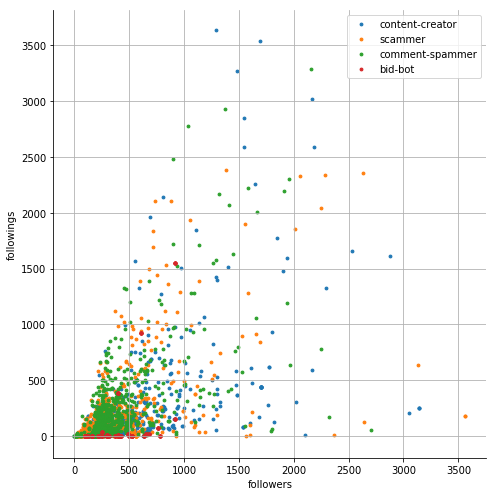

In [4]:
df1 = df[df['followings'] < 4000]
df1 = df1[df1['followers'] < 4000]
df1 = df1[df1['muters'] < 20]
df1 = df1[df1['sp ratio'] < 200]
df1 = df1[df1['follow ratio'] < 3]
df1 = df1[df1['posting_rewards'] < 2000]
df1 = df1[df1['curation_rewards'] < 250]
df1 = df1[df1['posts'] < 400]
df1 = df1[df1['comments'] < 8000]
df1 = df1[df1['average_post_len'] < 6000]
df1 = df1[df1['average_comment_len'] < 1000]
df1 = df1[df1['posts_to_comments_ratio'] < 10]

def add_legend():
    plt.legend(['content-creator', 'scammer', 'comment-spammer', 'bid-bot'])
    
def make_scatter_plot(d, x, y):
    sns.FacetGrid(d, hue="class", size=7).map(plt.scatter, x, y, s=8)
    add_legend()

make_scatter_plot(df1, 'followers', 'followings')

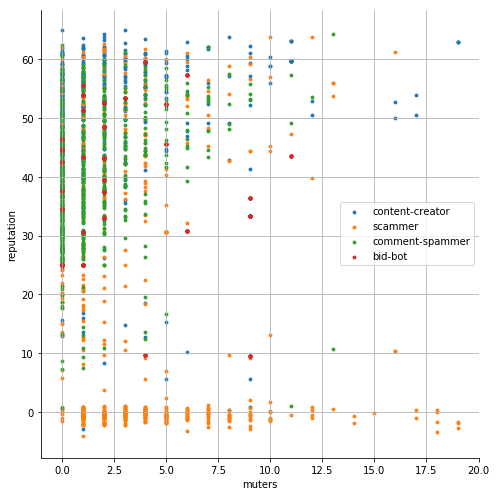

In [5]:
make_scatter_plot(df1, 'muters', 'reputation')

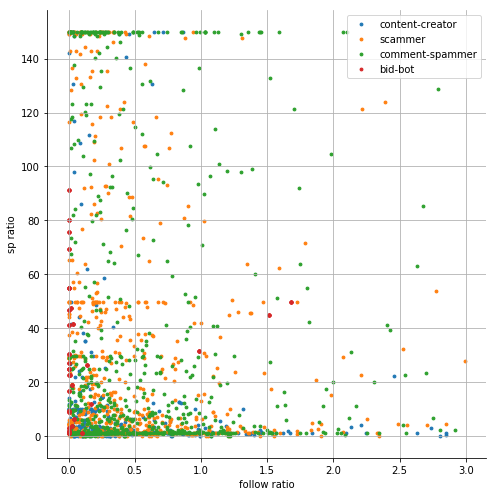

In [6]:
make_scatter_plot(df1, 'follow ratio', 'sp ratio')

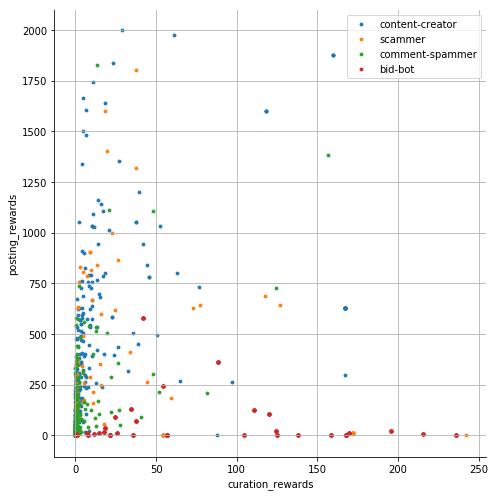

In [7]:
make_scatter_plot(df1, 'curation_rewards', 'posting_rewards')

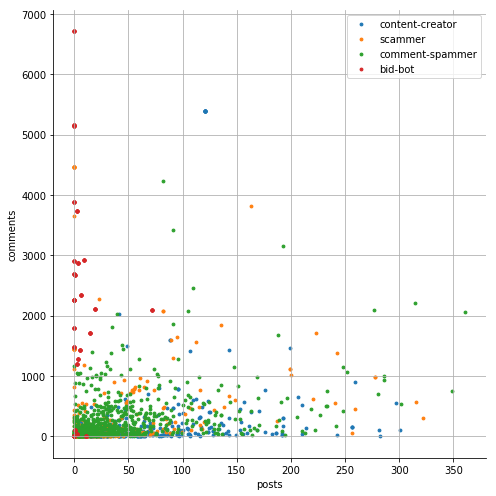

In [8]:
make_scatter_plot(df1, 'posts', 'comments')

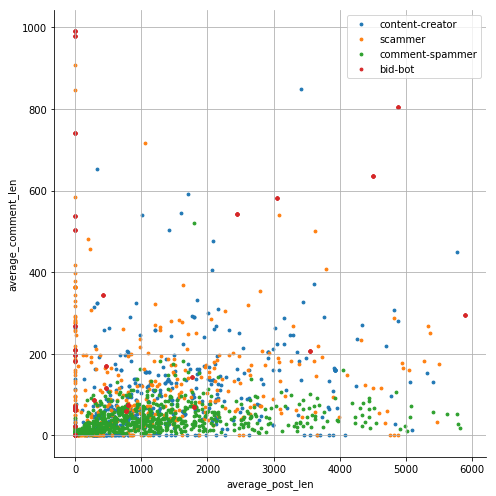

In [9]:
make_scatter_plot(df1, 'average_post_len', 'average_comment_len')

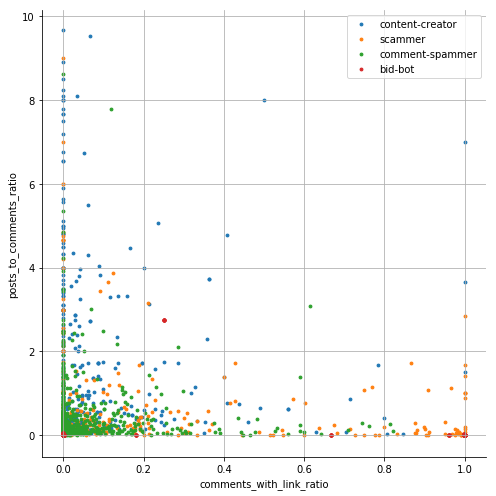

In [10]:
make_scatter_plot(df1, 'comments_with_link_ratio', 'posts_to_comments_ratio')

In [11]:
class_names = ['content-creator', 'scammer', 'comment-spammer', 'bid-bot']

def plot_confusion_matrix(cm):
    plt.figure(figsize = (10, 10))
    sns.heatmap(cm,
                annot=True,
                cmap="Greens",
                xticklabels=class_names,
                yticklabels=class_names,
                fmt = '0.0f')

Epoch 1/100
2249/2249 [==============================] - 3s 1ms/step - loss: 0.7210 - acc: 0.7114
Epoch 2/100
2249/2249 [==============================] - 3s 1ms/step - loss: 0.5164 - acc: 0.8088
Epoch 3/100
2249/2249 [==============================] - 2s 1ms/step - loss: 0.4822 - acc: 0.8137
Epoch 4/100
2249/2249 [==============================] - 3s 1ms/step - loss: 0.4537 - acc: 0.8244
Epoch 5/100
2249/2249 [==============================] - 3s 1ms/step - loss: 0.4396 - acc: 0.8333
Epoch 6/100
2249/2249 [==============================] - 4s 2ms/step - loss: 0.4324 - acc: 0.8328
Epoch 7/100
2249/2249 [==============================] - 3s 1ms/step - loss: 0.4184 - acc: 0.8435
Epoch 8/100
2249/2249 [==============================] - 3s 1ms/step - loss: 0.3980 - acc: 0.8390
Epoch 9/100
2249/2249 [==============================] - 3s 1ms/step - loss: 0.4070 - acc: 0.8408
Epoch 10/100
2249/2249 [==============================] - 3s 2ms/step - loss: 0.3934 - acc: 0.8462
Epoch 11/100
2249/2

2249/2249 [==============================] - 3s 1ms/step - loss: 0.2339 - acc: 0.9048
Epoch 84/100
2249/2249 [==============================] - 2s 1ms/step - loss: 0.2449 - acc: 0.9040
Epoch 85/100
2249/2249 [==============================] - 3s 1ms/step - loss: 0.2191 - acc: 0.9044
Epoch 86/100
2249/2249 [==============================] - 2s 1ms/step - loss: 0.2289 - acc: 0.9048
Epoch 87/100
2249/2249 [==============================] - 2s 1ms/step - loss: 0.2378 - acc: 0.9062
Epoch 88/100
2249/2249 [==============================] - 2s 1ms/step - loss: 0.2022 - acc: 0.9169
Epoch 89/100
2249/2249 [==============================] - 2s 1ms/step - loss: 0.2597 - acc: 0.9008
Epoch 90/100
2249/2249 [==============================] - 3s 1ms/step - loss: 0.2133 - acc: 0.9097
Epoch 91/100
2249/2249 [==============================] - 2s 1ms/step - loss: 0.2150 - acc: 0.9129
Epoch 92/100
2249/2249 [==============================] - 2s 1ms/step - loss: 0.2276 - acc: 0.9088
Epoch 93/100
2249/2249 

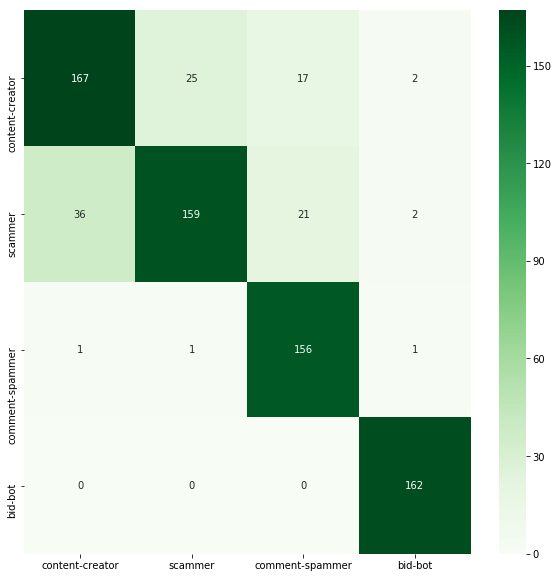

In [12]:
X_cols = columns
y_cols = ['class']
X = pd.DataFrame(QuantileTransformer().fit_transform(df[X_cols]))
y = to_categorical(df[y_cols])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
input_dim = len(X_cols)

model = Sequential()
model.add(Dense(85, input_dim=17, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)
score = model.evaluate(X_test, y_test,verbose=0)
y_pred = model.predict_classes(X_test)

print('accuracy: %.3f' % score[1])
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plot_confusion_matrix(cm)

accuracy: 0.951


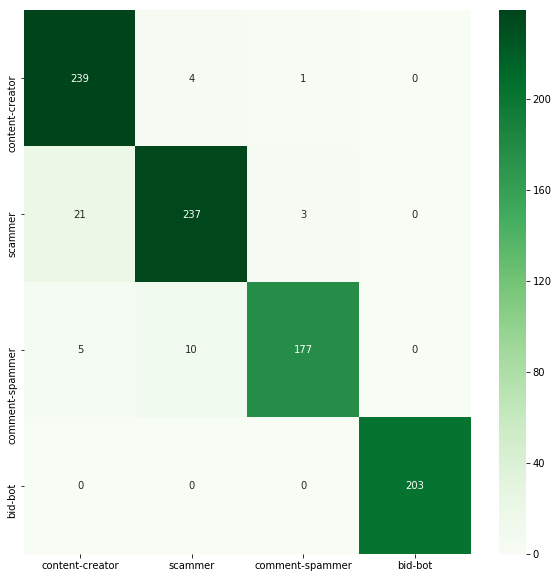

In [14]:
X_cols = columns
y_cols = ['class']
X = df[X_cols]
y = df[y_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
input_dim = len(X_cols)

model = tree.DecisionTreeClassifier(max_depth=8)

model.fit(X_train, y_train)
score = model.fit(X_test, y_test)
y_pred = model.predict(X_test)

print('accuracy: %.3f' % accuracy_score(y_pred, y_test))
cm = confusion_matrix(y_test, y_pred)

import graphviz
from sklearn.tree import export_graphviz

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=X_cols,
    class_names=class_names,
    filled=True,
    rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)

graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('dtree_render', view=True)

plot_confusion_matrix(cm)